In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
crypto = ['BTC-USD','ETH-USD','LTC-USD','XRP-USD','DOGE-USD']
data = pd.DataFrame()
for c in crypto:
    data[c] = wb.DataReader(c, data_source='yahoo', start='2019-1-1')['Adj Close']

In [4]:
data

,BTC-USD,ETH-USD,LTC-USD,XRP-USD,DOGE-USD
Date,,,,,
2018-12-31,3742.700439,133.368256,30.468224,0.352706,0.002346
2019-01-01,3843.520020,140.819412,31.979931,0.364771,0.002392
2019-01-02,3943.409424,155.047684,33.433681,0.375243,0.002407
2019-01-03,3836.741211,149.135010,32.026699,0.360224,0.002360
2019-01-04,3857.717529,154.581940,32.404167,0.356747,0.002315
...,...,...,...,...,...
2021-04-16,60683.820312,2344.895020,304.759918,1.560055,0.284173
2021-04-17,56216.183594,2237.136963,273.098816,1.405998,0.320475
2021-04-18,55724.265625,2166.188721,261.919220,1.315044,0.407318


In [5]:
#Utility functions for calculating Option Price
def d1(S, K, r, stdev, T):
    return (np.log(S/K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [6]:
def d2(S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [7]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [8]:
#Extracting Bitcoin data from Yahoo API
crypto = ['BTC-USD']
mydata = pd.DataFrame()
mydata[crypto] = wb.DataReader(crypto, data_source="yahoo", start="2019-1-1")['Adj Close']

In [9]:
#Bitcoin current Price in USD
BTC_Price = (float)(mydata.iloc[-1])
BTC_Price

54476.20703125

<AxesSubplot:xlabel='Date'>

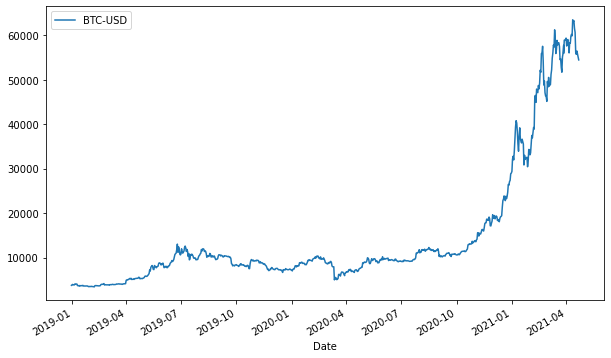

In [10]:
#Plot of Bitcoin Price
mydata.plot(figsize=(10,6))

In [11]:
log_returns = np.log(1 + mydata.pct_change())
log_returns

,BTC-USD
Date,
2018-12-31,NaN
2019-01-01,0.026581
2019-01-02,0.025657
2019-01-03,-0.027422
2019-01-04,0.005452
...,...
2021-04-16,-0.014543
2021-04-17,-0.076472
2021-04-18,-0.008789


In [12]:
stdev = log_returns.std() * 250 ** 0.5
stdev

BTC-USD    0.615017
dtype: float64

In [13]:
#Inputs for Black Scholes Model

#risk free interest rate(r)
r = 3.69

#Strike Price(K)
K = 80000

#Time to maturity(T)
T = 1

In [14]:
d1(BTC_Price, K, r, stdev, T)

BTC-USD    5.682544
dtype: float64

In [15]:
d2(BTC_Price, K, r, stdev, T)

BTC-USD    5.067527
dtype: float64

In [16]:
Option_Price1 = (float)(BSM(BTC_Price, K, r, stdev, T))
Option_Price1 

52478.446908968384

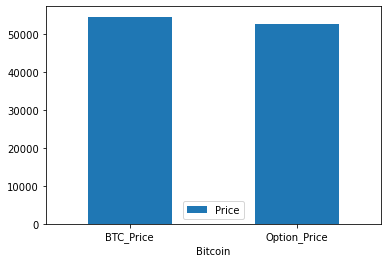

In [17]:
df = pd.DataFrame({'Bitcoin':['BTC_Price', 'Option_Price'], 'Price':[BTC_Price,Option_Price1]})
ax = df.plot.bar(x='Bitcoin', y='Price', rot=0)

In [18]:
#Extracting Ethereum data from Yahoo API
crypto = ['ETH-USD']
mydata = pd.DataFrame()
mydata[crypto] = wb.DataReader(crypto, data_source="yahoo", start="2019-1-1")['Adj Close']

In [19]:
#Ethereum current Price in USD
ETH_Price = (float)(mydata.iloc[-1])
ETH_Price

2438.1962890625

<AxesSubplot:xlabel='Date'>

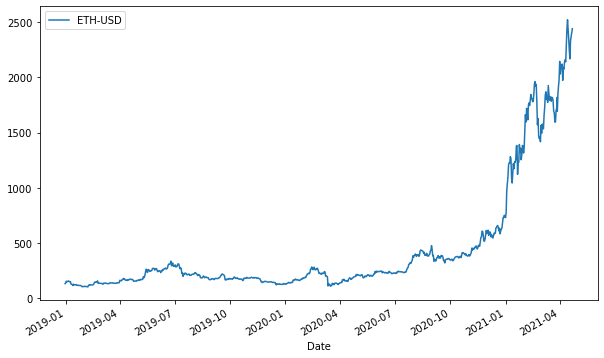

In [20]:
#Plot of Ethereum Price
mydata.plot(figsize=(10,6))

In [21]:
log_returns = np.log(1 + mydata.pct_change())
log_returns

,ETH-USD
Date,
2018-12-31,NaN
2019-01-01,0.054364
2019-01-02,0.096254
2019-01-03,-0.038881
2019-01-04,0.035872
...,...
2021-04-16,-0.036451
2021-04-17,-0.047044
2021-04-18,-0.032228


In [22]:
stdev = log_returns.std() * 250 ** 0.5
stdev

ETH-USD    0.776856
dtype: float64

In [23]:
#Inputs for Black Scholes Model

#risk free interest rate(r)
r = 2.75

#Strike Price(K)
K = 2300

#Time to maturity(T)
T = 1

In [24]:
d1(ETH_Price, K, r, stdev, T)

ETH-USD    4.003449
dtype: float64

In [25]:
d2(ETH_Price, K, r, stdev, T)

ETH-USD    3.226594
dtype: float64

In [26]:
Option_Price2 = (float)(BSM(ETH_Price, K, r, stdev, T))
Option_Price2 

2291.1782025081075

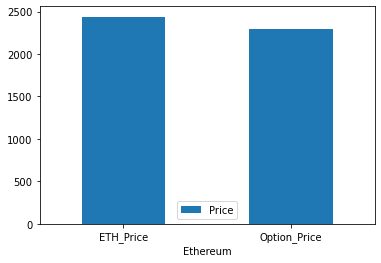

In [27]:
df = pd.DataFrame({'Ethereum':['ETH_Price', 'Option_Price'], 'Price':[ETH_Price,Option_Price2]})
ax = df.plot.bar(x='Ethereum', y='Price', rot=0)

In [28]:
#Extracting Litecoin data from Yahoo API
crypto = ['LTC-USD']
mydata = pd.DataFrame()
mydata[crypto] = wb.DataReader(crypto, data_source="yahoo", start="2019-1-1")['Adj Close']

In [29]:
#Litecoin current Price in USD
LTC_Price = (float)(mydata.iloc[-1])
LTC_Price

262.65008544921875

<AxesSubplot:xlabel='Date'>

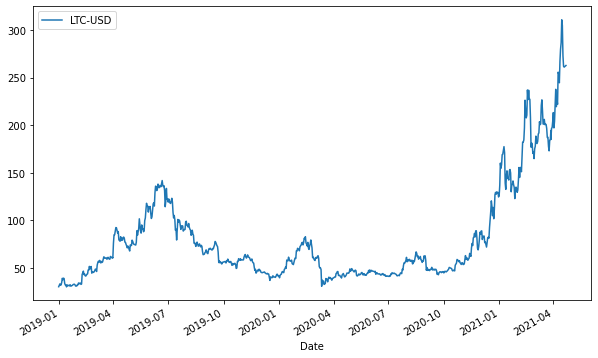

In [30]:
#Plot of Litecoin Price
mydata.plot(figsize=(10,6))

In [31]:
log_returns = np.log(1 + mydata.pct_change())
log_returns

,LTC-USD
Date,
2018-12-31,NaN
2019-01-01,0.048424
2019-01-02,0.044455
2019-01-03,-0.042994
2019-01-04,0.011717
...,...
2021-04-16,-0.019023
2021-04-17,-0.109691
2021-04-18,-0.041798


In [32]:
stdev = log_returns.std() * 250 ** 0.5
stdev

LTC-USD    0.817723
dtype: float64

In [33]:
#Inputs for Black Scholes Model

#risk free interest rate(r)
r = 3.15

#Strike Price(K)
K = 240

#Time to maturity(T)
T = 1

In [34]:
d1(LTC_Price, K, r, stdev, T)

LTC-USD    4.37131
dtype: float64

In [35]:
d2(LTC_Price, K, r, stdev, T)

LTC-USD    3.553587
dtype: float64

In [36]:
Option_Price3 = (float)(BSM(LTC_Price, K, r, stdev, T))
Option_Price3 

252.36590722744998

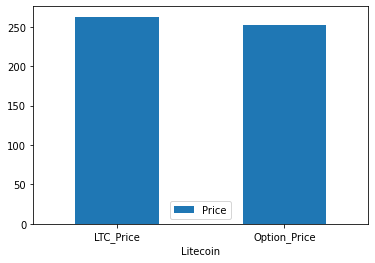

In [37]:
df = pd.DataFrame({'Litecoin':['LTC_Price', 'Option_Price'], 'Price':[LTC_Price,Option_Price3]})
ax = df.plot.bar(x='Litecoin', y='Price', rot=0)

In [38]:
#Extracting Ripple data from Yahoo API
crypto = ['XRP-USD']
mydata = pd.DataFrame()
mydata[crypto] = wb.DataReader(crypto, data_source="yahoo", start="2019-1-1")['Adj Close']

In [39]:
#Ripple current Price in USD
XRP_Price = (float)(mydata.iloc[-1])
XRP_Price

1.3313039541244507

<AxesSubplot:xlabel='Date'>

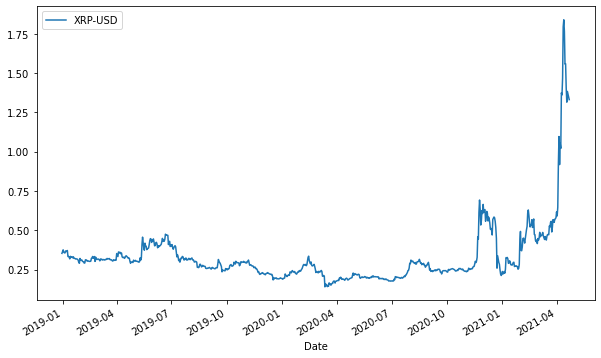

In [40]:
#Plot of Ripple Price
mydata.plot(figsize=(10,6))

In [41]:
log_returns = np.log(1 + mydata.pct_change())
log_returns

,XRP-USD
Date,
2018-12-31,NaN
2019-01-01,0.033635
2019-01-02,0.028304
2019-01-03,-0.040848
2019-01-04,-0.009699
...,...
2021-04-16,0.001622
2021-04-17,-0.103974
2021-04-18,-0.066877


In [42]:
stdev = log_returns.std() * 250 ** 0.5
stdev

XRP-USD    0.931589
dtype: float64

In [43]:
#Inputs for Black Scholes Model

#risk free interest rate(r)
r = 2.25

#Strike Price(K)
K = 1.12

#Time to maturity(T)
T = 1

In [44]:
d1(XRP_Price, K, r, stdev, T)

XRP-USD    3.066544
dtype: float64

In [45]:
d2(XRP_Price, K, r, stdev, T)

XRP-USD    2.134955
dtype: float64

In [46]:
Option_Price4 = (float)(BSM(XRP_Price, K, r, stdev, T))
Option_Price4 

1.2137492499419615

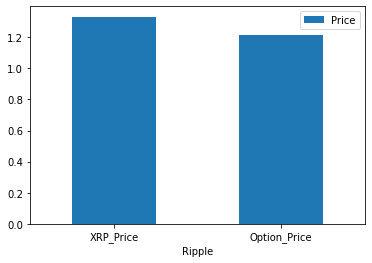

In [47]:
df = pd.DataFrame({'Ripple':['XRP_Price', 'Option_Price'], 'Price':[XRP_Price,Option_Price4]})
ax = df.plot.bar(x='Ripple', y='Price', rot=0)

In [48]:
#Extracting Dogecoin data from Yahoo API
crypto = ['DOGE-USD']
mydata = pd.DataFrame()
mydata[crypto] = wb.DataReader(crypto, data_source="yahoo", start="2019-1-1")['Adj Close']

In [49]:
#Dogecoin current Price in USD
DOGE_Price = (float)(mydata.iloc[-1])
DOGE_Price

0.30600520968437195

<AxesSubplot:xlabel='Date'>

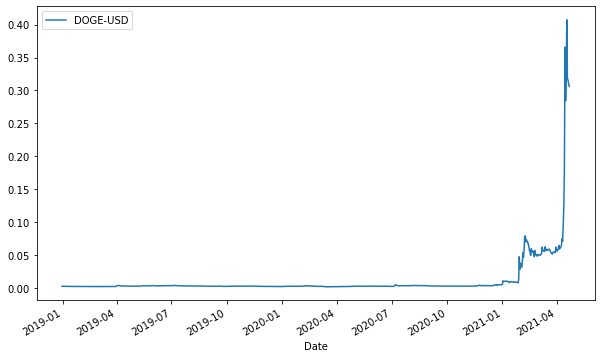

In [50]:
#Plot of Dogecoin Price
mydata.plot(figsize=(10,6))

In [51]:
log_returns = np.log(1 + mydata.pct_change())
log_returns

,DOGE-USD
Date,
2018-12-31,NaN
2019-01-01,0.019418
2019-01-02,0.006251
2019-01-03,-0.019719
2019-01-04,-0.019252
...,...
2021-04-16,-0.252695
2021-04-17,0.120221
2021-04-18,0.239790


In [52]:
stdev = log_returns.std() * 250 ** 0.5
stdev

DOGE-USD    1.319805
dtype: float64

In [53]:
#Inputs for Black Scholes Model

#risk free interest rate(r)
r = 1.15

#Strike Price(K)
K = 0.25

#Time to maturity(T)
T = 1

In [54]:
d1(DOGE_Price, K, r, stdev, T)

DOGE-USD    1.684403
dtype: float64

In [55]:
d2(DOGE_Price, K, r, stdev, T)

DOGE-USD    0.364598
dtype: float64

In [56]:
Option_Price5 = (float)(BSM(DOGE_Price, K, r, stdev, T))
Option_Price5

0.24106958993471675

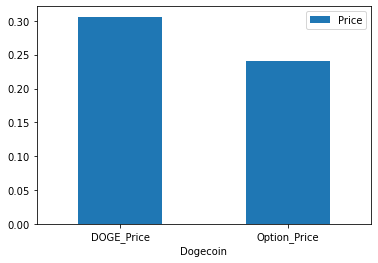

In [57]:
df = pd.DataFrame({'Dogecoin':['DOGE_Price', 'Option_Price'], 'Price':[DOGE_Price,Option_Price5]})
ax = df.plot.bar(x='Dogecoin', y='Price', rot=0)

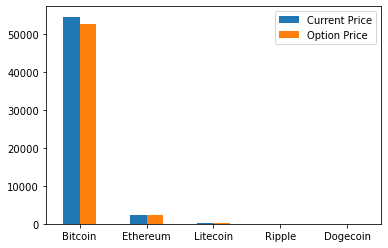

In [58]:
Current_Price = [BTC_Price, ETH_Price, LTC_Price, XRP_Price, DOGE_Price]
Option_Price = [Option_Price1, Option_Price2, Option_Price3, Option_Price4, Option_Price5]
index = ['Bitcoin', 'Ethereum', 'Litecoin', 'Ripple', 'Dogecoin']

df = pd.DataFrame({'Current Price': Current_Price, 'Option Price': Option_Price}, index = index)
ax = df.plot.bar(rot=0)